# Please type your student ID:1081447

# HW2-1: Simple Linear Regression

In [1]:
#先導入資料處理會用到的模組
import numpy as np
import numpy.random as random
import scipy as sp
from pandas import Series, DataFrame
import pandas as pd

# 可視化模組
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline

# 機器學習模組
import sklearn

# 表示到小數第三位
%precision 3

from sklearn import linear_model
#生成線性回歸模型
reg = linear_model.LinearRegression()

In [2]:
csv_data = pd.read_csv('student-por.csv', sep = ';')
csv_data

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,services,other,...,5,4,2,1,2,5,4,10,11,10
645,MS,F,18,U,LE3,T,3,1,teacher,services,...,4,3,4,1,1,1,4,15,15,16
646,MS,F,18,U,GT3,T,1,1,other,other,...,1,1,1,1,1,5,6,11,12,9
647,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,6,10,10,10


In [3]:
#解釋變數使用第一學期的成績
#loc從DataFrame取出指定列與行
#loc[:,['G1']]會取出G1行的所有列
X = csv_data.loc[:,['absences']].values

#目標函數使用最後一學期的數學成績
Y = csv_data['G3'].values

#計算預測模型，在此算出a,b
reg.fit(X, Y)

#迴歸係數
print('迴歸係數:', reg.coef_)

#截距
print('截距 :', reg.intercept_)

#決定係數
print('決定係數:', reg.score(X, Y))

迴歸係數: [-0.064]
截距 : 12.138800862687443
決定係數: 0.008350131955637385


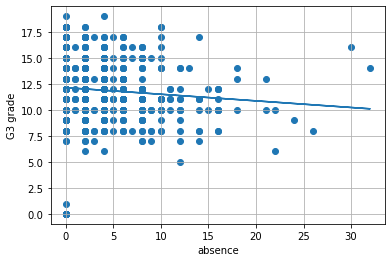

In [4]:
#散佈圖
plt.scatter(X, Y)
plt.xlabel('absence')
plt.ylabel('G3 grade')

#在其上拉出線性迴歸直線
plt.plot(X, reg.predict(X))
plt.grid(True)

# HW2-2: Mutiple Linear Regression

In [5]:
#先導入資料處理會用到的模組
import numpy as np
import numpy.random as random
import scipy as sp
from pandas import Series, DataFrame
import pandas as pd

# 可視化模組
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline

# 機器學習模組
import sklearn

# 表示到小數第三位
%precision 3

'%.3f'

In [6]:
import requests, zipfile
import io

# 取得汽車data
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data'
res = requests.get(url).content

# 將取得的資料作為DataFrame物件讀取
auto = pd.read_csv(io.StringIO(res.decode('utf-8')), header=None)

# 在資料的行裡設定標籤
auto.columns =['symboling','normalized-losses','make','fuel-type' ,'aspiration','num-of-doors',
                            'body-style','drive-wheels','engine-location','wheel-base','length','width','height',
                            'curb-weight','engine-type','num-of-cylinders','engine-size','fuel-system','bore',
                            'stroke','compression-ratio','horsepower','peak-rpm','city-mpg','highway-mpg','price']

In [7]:
print('汽車資料的形式:{}'.format(auto.shape))

汽車資料的形式:(205, 26)


In [8]:
#顯示最開始的5列
auto.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [9]:
# 計算各個行(欄位)裡有多少個“？”
auto = auto[['price', 'width', 'engine-size']]
auto.isin(['?']).sum()

price          4
width          0
engine-size    0
dtype: int64

In [10]:
# 將?取代為NaN，刪除有NaN的列
auto = auto.replace('?', np.nan).dropna()
print('汽車資料的形式:{}'.format(auto.shape))

汽車資料的形式:(201, 3)


In [11]:
print('資料型別的確認（型別轉換前）\n{}\n'.format(auto.dtypes))

資料型別的確認（型別轉換前）
price           object
width          float64
engine-size      int64
dtype: object



In [12]:
#資料型別轉換
auto = auto.assign(price=pd.to_numeric(auto.price))

print('資料型別的確認（型別轉換後）\n{}'.format(auto.dtypes))

資料型別的確認（型別轉換後）
price            int64
width          float64
engine-size      int64
dtype: object


In [13]:
#觀察相關性
auto.corr()

,price,width,engine-size
price,1.000000,0.751265,0.872335
width,0.751265,1.000000,0.729436
engine-size,0.872335,0.729436,1.000000


In [14]:
# 為了資料分割(訓練資料與測試資料)的匯入
from sklearn.model_selection import train_test_split

# 為了多元線性迴歸模型建構的導入
from sklearn.linear_model import LinearRegression

 # 指定目標變數為price、其他為解釋變數
X = auto.drop('price', axis=1)
Y = auto['price']

# 分為訓練資料與測試資料
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.5, random_state=0)

# 多元線性迴歸的初始化學習
model = LinearRegression()
model.fit(X_train,Y_train)

# 顯示決定係數
print('決定係數(train):{:.3f}'.format(model.score(X_train,Y_train)))
print('決定係數(test):{:.3f}'.format(model.score(X_test,Y_test)))

# 顯示迴歸係數與截距
print('\n迴歸係數\n{}'.format(pd.Series(model.coef_, index=X.columns)))
print('截距: {:.3f}'.format(model.intercept_))

決定係數(train):0.783
決定係數(test):0.778

迴歸係數
width          1261.735518
engine-size     109.526787
dtype: float64
截距: -84060.643
